In [1]:
import numpy as np
import seaborn as sns

## Original halo

In [25]:
halo = np.loadtxt('original_catalogue.dat', comments='#', usecols=(1,5,6,10,11,17,18,19), dtype=[('id', int), ('id1', int), ('id2', int), ('M_h', float), ('Rvir', float), ('X', float), ('Y', float), ('Z', float)])

In [26]:
index = ((halo['id1'] != -1) | (halo['id2'] != -1))
main_halo = halo[~index]

In [33]:
main_halo_final = np.zeros(len(main_halo), dtype=[('id', int), ('M_h', float), ('Rvir', float), ('X', float), ('Y', float), ('Z', float)])
for k in main_halo_final.dtype.names:
    main_halo_final[k] = main_halo[k]

np.save('main_halo', main_halo_final)

## main halo catalogue(z space)

In [26]:
halo = np.loadtxt('haloinfo_zspace.dat', dtype=[('id', int), ('id1', int), ('id2', int), ('M_h', float), ('X', float), ('Y', float), ('Z', float)])

In [ ]:
halo1 = halo[63:]
index = ((halo1['id1'] != -1) | (halo1['id2'] != -1))
main_halo = halo1[~index]

In [ ]:
main_halo_final = np.zeros(len(main_halo), dtype=[('id', int), ('M_h', float), ('X', float), ('Y', float), ('Z', float)])
for k in main_halo_final.dtype.names:
    main_halo_final[k] = main_halo[k]

In [56]:
np.save('main_halo_zspace', main_halo_final)

In [10]:
main_halo_z = np.load('main_halo_zspace.npy')

<Axes: ylabel='Count'>

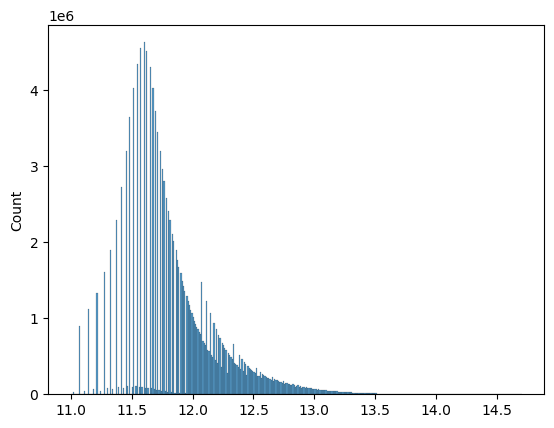

In [6]:
sns.histplot(np.log10(main_halo_final['M_h']), binrange=(11, 14.7), binwidth=0.01)

<Axes: ylabel='Count'>

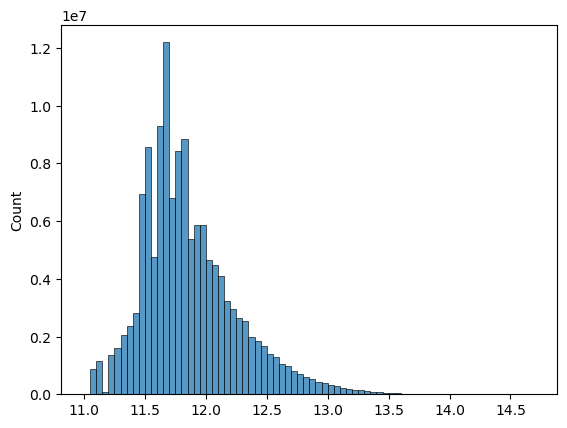

In [7]:
sns.histplot(np.log10(main_halo_final['M_h']), binrange=(11, 14.7), binwidth=0.05)

In [19]:
np.log10(main_halo_final['M_h'].max())

14.708293397717032

## construct a sattelite catalogue

In [34]:
halos = np.load('main_halo.npy')

In [37]:
particles = np.loadtxt('dm_xyz_snap_010.dat')

In [39]:
import tqdm
from sklearn.neighbors import KDTree

In [43]:
tree = KDTree(particles, metric='euclidean')

In [44]:
result = tree.query_radius([[1, 2, 3]], [10])

In [47]:
particles[result[0]]

array([[ 2.7903769 ,  5.26640892,  1.58428919],
       [ 0.44461188,  2.82392406, 11.1325941 ],
       [ 5.67446947,  3.63039231, 11.5399313 ],
       [ 5.43291807,  2.45891547,  9.46079731],
       [ 3.39225841,  2.05701327,  9.38157558],
       [10.3360147 ,  3.57752967,  5.76412916],
       [ 3.16845965,  2.51406693,  0.91634017],
       [ 0.8307305 ,  5.52360582, 11.8667316 ],
       [ 3.13242769,  8.25555515,  4.54054499],
       [ 2.19736934, 11.8170872 ,  4.06828499],
       [ 0.54648167,  8.81634712,  9.42419147]])

In [46]:
result[0]

array([  2,   7,  23,   4,   6,  58,   0,  14,   1, 169,   5])

In [ ]:
logMh_m = 11.5
logMh_M = 14.72
logMh_bin = 0.02
logMh_N = int((logMh_M - logMh_m) / logMh_bin)

bins = np.arange(logMh_N+1) * logMh_bin + logMh_m
res = np.digitize(np.log10(halos['M_h']), bins)

In [64]:
relative_displace = []
for j in range(1, logMh_N+1):
    halo1 = halos[res == j]
    print(f'bin {j}... ', end='')
    result = tree.query_radius(np.c_[halo1['X'], halo1['Y'], halo1['Z']], (halo1['Rvir'].mean()) / 1e3)
    
    lengths = np.array([len(_res) for _res in result])
    index_s = np.where(lengths>0)[0]

    print(f'get {len(index_s)} non zero halos')
    delta_pos = np.zeros((lengths.sum(), 3), float)
    index = 0
    for i in tqdm.tqdm(index_s):
        par = particles[result[i]]
        length_single = len(result[i])
        delta_pos[index:index+length_single,0] = par[:,0].T - halo1['X'][i]
        delta_pos[index:index+length_single,1] = par[:,1].T - halo1['Y'][i]
        delta_pos[index:index+length_single,2] = par[:,2].T - halo1['Z'][i]
        index += length_single
    assert index == delta_pos.shape[0]
    relative_displace.append(delta_pos)

bin 1... get 279922 non zero halos


100%|██████████| 279922/279922 [00:03<00:00, 92418.76it/s]


bin 2... get 4337 non zero halos


100%|██████████| 4337/4337 [00:00<00:00, 91022.66it/s]


bin 3... get 317919 non zero halos


100%|██████████| 317919/317919 [00:03<00:00, 93228.63it/s]


bin 4... get 360118 non zero halos


100%|██████████| 360118/360118 [00:03<00:00, 93971.80it/s]


bin 5... get 4228 non zero halos


100%|██████████| 4228/4228 [00:00<00:00, 90684.41it/s]


bin 6... get 385242 non zero halos


100%|██████████| 385242/385242 [00:04<00:00, 93624.31it/s]


bin 7... get 397183 non zero halos


100%|██████████| 397183/397183 [00:04<00:00, 93334.68it/s]


bin 8... get 394211 non zero halos


100%|██████████| 394211/394211 [00:04<00:00, 94356.49it/s]


bin 9... get 391310 non zero halos


100%|██████████| 391310/391310 [00:04<00:00, 93129.91it/s]


bin 10... get 378761 non zero halos


100%|██████████| 378761/378761 [00:04<00:00, 93200.12it/s]


bin 11... get 365799 non zero halos


100%|██████████| 365799/365799 [00:03<00:00, 92322.90it/s]


bin 12... get 353704 non zero halos


100%|██████████| 353704/353704 [00:03<00:00, 94459.91it/s]


bin 13... get 340632 non zero halos


100%|██████████| 340632/340632 [00:03<00:00, 93626.47it/s]


bin 14... get 333457 non zero halos


100%|██████████| 333457/333457 [00:03<00:00, 94343.21it/s]


bin 15... get 319246 non zero halos


100%|██████████| 319246/319246 [00:03<00:00, 93239.75it/s]


bin 16... get 607011 non zero halos


100%|██████████| 607011/607011 [00:06<00:00, 94686.50it/s]


bin 17... get 289235 non zero halos


100%|██████████| 289235/289235 [00:03<00:00, 93327.06it/s]


bin 18... get 283225 non zero halos


100%|██████████| 283225/283225 [00:03<00:00, 94050.29it/s]


bin 19... get 534757 non zero halos


100%|██████████| 534757/534757 [00:05<00:00, 93984.03it/s]


bin 20... get 258974 non zero halos


100%|██████████| 258974/258974 [00:02<00:00, 93892.08it/s]


bin 21... get 492219 non zero halos


100%|██████████| 492219/492219 [00:05<00:00, 93844.82it/s]


bin 22... get 465804 non zero halos


100%|██████████| 465804/465804 [00:04<00:00, 94915.00it/s]


bin 23... get 225669 non zero halos


100%|██████████| 225669/225669 [00:02<00:00, 94375.46it/s]


bin 24... get 432169 non zero halos


100%|██████████| 432169/432169 [00:04<00:00, 95262.48it/s]


bin 25... get 409925 non zero halos


100%|██████████| 409925/409925 [00:04<00:00, 94324.08it/s]


bin 26... get 391282 non zero halos


100%|██████████| 391282/391282 [00:04<00:00, 95240.83it/s]


bin 27... get 372993 non zero halos


100%|██████████| 372993/372993 [00:03<00:00, 94109.30it/s]


bin 28... get 356670 non zero halos


100%|██████████| 356670/356670 [00:03<00:00, 94530.33it/s]


bin 29... get 504600 non zero halos


100%|██████████| 504600/504600 [00:05<00:00, 93824.21it/s]


bin 30... get 320168 non zero halos


100%|██████████| 320168/320168 [00:03<00:00, 94969.71it/s]


bin 31... get 454338 non zero halos


100%|██████████| 454338/454338 [00:04<00:00, 94144.35it/s]


bin 32... get 289162 non zero halos


100%|██████████| 289162/289162 [00:03<00:00, 95037.96it/s]


bin 33... get 413271 non zero halos


100%|██████████| 413271/413271 [00:04<00:00, 93899.24it/s]


bin 34... get 390104 non zero halos


100%|██████████| 390104/390104 [00:04<00:00, 94785.94it/s]


bin 35... get 367890 non zero halos


100%|██████████| 367890/367890 [00:03<00:00, 94341.56it/s]


bin 36... get 351002 non zero halos


100%|██████████| 351002/351002 [00:03<00:00, 95280.58it/s]


bin 37... get 332269 non zero halos


100%|██████████| 332269/332269 [00:03<00:00, 94260.94it/s]


bin 38... get 418257 non zero halos


100%|██████████| 418257/418257 [00:04<00:00, 95190.53it/s]


bin 39... get 392061 non zero halos


100%|██████████| 392061/392061 [00:04<00:00, 94209.49it/s]


bin 40... get 279405 non zero halos


100%|██████████| 279405/279405 [00:02<00:00, 95095.19it/s]


bin 41... get 353869 non zero halos


100%|██████████| 353869/353869 [00:03<00:00, 94408.51it/s]


bin 42... get 412823 non zero halos


100%|██████████| 412823/412823 [00:04<00:00, 95412.48it/s]


bin 43... get 310109 non zero halos


100%|██████████| 310109/310109 [00:03<00:00, 93280.81it/s]


bin 44... get 293786 non zero halos


100%|██████████| 293786/293786 [00:03<00:00, 95008.08it/s]


bin 45... get 347004 non zero halos


100%|██████████| 347004/347004 [00:03<00:00, 93759.31it/s]


bin 46... get 324446 non zero halos


100%|██████████| 324446/324446 [00:03<00:00, 94955.50it/s]


bin 47... get 363705 non zero halos


100%|██████████| 363705/363705 [00:03<00:00, 93550.73it/s]


bin 48... get 283782 non zero halos


100%|██████████| 283782/283782 [00:02<00:00, 95172.77it/s]


bin 49... get 319468 non zero halos


100%|██████████| 319468/319468 [00:03<00:00, 94317.73it/s]


bin 50... get 300105 non zero halos


100%|██████████| 300105/300105 [00:03<00:00, 93906.10it/s]


bin 51... get 280816 non zero halos


100%|██████████| 280816/280816 [00:02<00:00, 93984.67it/s]


bin 52... get 304710 non zero halos


100%|██████████| 304710/304710 [00:03<00:00, 95076.37it/s]


bin 53... get 283702 non zero halos


100%|██████████| 283702/283702 [00:03<00:00, 94299.82it/s]


bin 54... get 264854 non zero halos


100%|██████████| 264854/264854 [00:02<00:00, 95123.43it/s]


bin 55... get 280934 non zero halos


100%|██████████| 280934/280934 [00:02<00:00, 94079.37it/s]


bin 56... get 261717 non zero halos


100%|██████████| 261717/261717 [00:02<00:00, 95162.85it/s]


bin 57... get 243162 non zero halos


100%|██████████| 243162/243162 [00:02<00:00, 93588.05it/s]


bin 58... get 254294 non zero halos


100%|██████████| 254294/254294 [00:02<00:00, 94055.43it/s]


bin 59... get 235018 non zero halos


100%|██████████| 235018/235018 [00:02<00:00, 94593.93it/s]


bin 60... get 242126 non zero halos


100%|██████████| 242126/242126 [00:02<00:00, 94883.41it/s]


bin 61... get 223656 non zero halos


100%|██████████| 223656/223656 [00:02<00:00, 93802.83it/s]


bin 62... get 207426 non zero halos


100%|██████████| 207426/207426 [00:02<00:00, 94668.73it/s]


bin 63... get 211064 non zero halos


100%|██████████| 211064/211064 [00:02<00:00, 93731.67it/s]


bin 64... get 211462 non zero halos


100%|██████████| 211462/211462 [00:02<00:00, 94692.86it/s]


bin 65... get 195050 non zero halos


100%|██████████| 195050/195050 [00:02<00:00, 94005.51it/s]


bin 66... get 179302 non zero halos


100%|██████████| 179302/179302 [00:01<00:00, 95176.57it/s]


bin 67... get 191596 non zero halos


100%|██████████| 191596/191596 [00:02<00:00, 93074.51it/s]


bin 68... get 163909 non zero halos


100%|██████████| 163909/163909 [00:01<00:00, 94337.76it/s]


bin 69... get 173821 non zero halos


100%|██████████| 173821/173821 [00:01<00:00, 93743.60it/s]


bin 70... get 158007 non zero halos


100%|██████████| 158007/158007 [00:01<00:00, 94345.35it/s]


bin 71... get 153266 non zero halos


100%|██████████| 153266/153266 [00:01<00:00, 93253.90it/s]


bin 72... get 149375 non zero halos


100%|██████████| 149375/149375 [00:01<00:00, 93968.13it/s]


bin 73... get 135512 non zero halos


100%|██████████| 135512/135512 [00:01<00:00, 93427.24it/s]


bin 74... get 137468 non zero halos


100%|██████████| 137468/137468 [00:01<00:00, 94192.00it/s]


bin 75... get 125130 non zero halos


100%|██████████| 125130/125130 [00:01<00:00, 93178.11it/s]


bin 76... get 119428 non zero halos


100%|██████████| 119428/119428 [00:01<00:00, 93912.36it/s]


bin 77... get 113385 non zero halos


100%|██████████| 113385/113385 [00:01<00:00, 93011.39it/s]


bin 78... get 106916 non zero halos


100%|██████████| 106916/106916 [00:01<00:00, 93077.00it/s]


bin 79... get 101383 non zero halos


100%|██████████| 101383/101383 [00:01<00:00, 92245.03it/s]


bin 80... get 95466 non zero halos


100%|██████████| 95466/95466 [00:01<00:00, 92996.41it/s]


bin 81... get 89401 non zero halos


100%|██████████| 89401/89401 [00:00<00:00, 92887.94it/s]


bin 82... get 83843 non zero halos


100%|██████████| 83843/83843 [00:00<00:00, 93693.93it/s]


bin 83... get 80450 non zero halos


100%|██████████| 80450/80450 [00:00<00:00, 92931.96it/s]


bin 84... get 75066 non zero halos


100%|██████████| 75066/75066 [00:00<00:00, 93205.76it/s]


bin 85... get 69417 non zero halos


100%|██████████| 69417/69417 [00:00<00:00, 92823.70it/s]


bin 86... get 65947 non zero halos


100%|██████████| 65947/65947 [00:00<00:00, 93011.68it/s]


bin 87... get 60899 non zero halos


100%|██████████| 60899/60899 [00:00<00:00, 91122.26it/s]


bin 88... get 57281 non zero halos


100%|██████████| 57281/57281 [00:00<00:00, 92399.56it/s]


bin 89... get 53812 non zero halos


100%|██████████| 53812/53812 [00:00<00:00, 91446.14it/s]


bin 90... get 49359 non zero halos


100%|██████████| 49359/49359 [00:00<00:00, 92909.10it/s]


bin 91... get 45969 non zero halos


100%|██████████| 45969/45969 [00:00<00:00, 90750.67it/s]


bin 92... get 42939 non zero halos


100%|██████████| 42939/42939 [00:00<00:00, 92484.02it/s]


bin 93... get 38700 non zero halos


100%|██████████| 38700/38700 [00:00<00:00, 91343.95it/s]


bin 94... get 36564 non zero halos


100%|██████████| 36564/36564 [00:00<00:00, 91625.15it/s]


bin 95... get 33993 non zero halos


100%|██████████| 33993/33993 [00:00<00:00, 91174.11it/s]


bin 96... get 31601 non zero halos


100%|██████████| 31601/31601 [00:00<00:00, 91224.14it/s]


bin 97... get 28105 non zero halos


100%|██████████| 28105/28105 [00:00<00:00, 89784.68it/s]


bin 98... get 26771 non zero halos


100%|██████████| 26771/26771 [00:00<00:00, 91439.29it/s]


bin 99... get 24384 non zero halos


100%|██████████| 24384/24384 [00:00<00:00, 89675.57it/s]


bin 100... get 22654 non zero halos


100%|██████████| 22654/22654 [00:00<00:00, 90479.06it/s]


bin 101... get 20444 non zero halos


100%|██████████| 20444/20444 [00:00<00:00, 87884.11it/s]


bin 102... get 18923 non zero halos


100%|██████████| 18923/18923 [00:00<00:00, 89540.33it/s]


bin 103... get 17110 non zero halos


100%|██████████| 17110/17110 [00:00<00:00, 88770.92it/s]


bin 104... get 15704 non zero halos


100%|██████████| 15704/15704 [00:00<00:00, 89666.19it/s]


bin 105... get 14360 non zero halos


100%|██████████| 14360/14360 [00:00<00:00, 87314.70it/s]


bin 106... get 11612 non zero halos


100%|██████████| 11612/11612 [00:00<00:00, 88104.66it/s]


bin 107... get 10193 non zero halos


100%|██████████| 10193/10193 [00:00<00:00, 86502.63it/s]


bin 108... get 9173 non zero halos


100%|██████████| 9173/9173 [00:00<00:00, 86827.21it/s]


bin 109... get 8328 non zero halos


100%|██████████| 8328/8328 [00:00<00:00, 86282.04it/s]


bin 110... get 7488 non zero halos


100%|██████████| 7488/7488 [00:00<00:00, 87668.42it/s]


bin 111... get 6808 non zero halos


100%|██████████| 6808/6808 [00:00<00:00, 86214.17it/s]


bin 112... get 6091 non zero halos


100%|██████████| 6091/6091 [00:00<00:00, 86960.17it/s]


bin 113... get 5489 non zero halos


100%|██████████| 5489/5489 [00:00<00:00, 86197.99it/s]


bin 114... get 4956 non zero halos


100%|██████████| 4956/4956 [00:00<00:00, 85822.10it/s]


bin 115... get 4255 non zero halos


100%|██████████| 4255/4255 [00:00<00:00, 84487.32it/s]


bin 116... get 3882 non zero halos


100%|██████████| 3882/3882 [00:00<00:00, 84745.76it/s]


bin 117... get 3687 non zero halos


100%|██████████| 3687/3687 [00:00<00:00, 84965.49it/s]


bin 118... get 3073 non zero halos


100%|██████████| 3073/3073 [00:00<00:00, 82790.65it/s]


bin 119... get 2785 non zero halos


100%|██████████| 2785/2785 [00:00<00:00, 83276.68it/s]


bin 120... get 2435 non zero halos


100%|██████████| 2435/2435 [00:00<00:00, 83139.70it/s]


bin 121... get 2192 non zero halos


100%|██████████| 2192/2192 [00:00<00:00, 83050.27it/s]


bin 122... get 1854 non zero halos


100%|██████████| 1854/1854 [00:00<00:00, 80825.69it/s]


bin 123... get 1693 non zero halos


100%|██████████| 1693/1693 [00:00<00:00, 82111.92it/s]


bin 124... get 1598 non zero halos


100%|██████████| 1598/1598 [00:00<00:00, 79607.78it/s]


bin 125... get 1285 non zero halos


100%|██████████| 1285/1285 [00:00<00:00, 74884.76it/s]


bin 126... get 1120 non zero halos


100%|██████████| 1120/1120 [00:00<00:00, 78489.90it/s]


bin 127... get 997 non zero halos


100%|██████████| 997/997 [00:00<00:00, 75185.12it/s]


bin 128... get 896 non zero halos


100%|██████████| 896/896 [00:00<00:00, 76054.81it/s]


bin 129... get 720 non zero halos


100%|██████████| 720/720 [00:00<00:00, 74618.84it/s]


bin 130... get 672 non zero halos


100%|██████████| 672/672 [00:00<00:00, 73394.59it/s]


bin 131... get 586 non zero halos


100%|██████████| 586/586 [00:00<00:00, 72829.86it/s]


bin 132... get 524 non zero halos


100%|██████████| 524/524 [00:00<00:00, 70134.83it/s]


bin 133... get 428 non zero halos


100%|██████████| 428/428 [00:00<00:00, 67977.97it/s]


bin 134... get 395 non zero halos


100%|██████████| 395/395 [00:00<00:00, 67416.08it/s]


bin 135... get 306 non zero halos


100%|██████████| 306/306 [00:00<00:00, 62337.03it/s]


bin 136... get 248 non zero halos


100%|██████████| 248/248 [00:00<00:00, 61415.09it/s]


bin 137... get 221 non zero halos


100%|██████████| 221/221 [00:00<00:00, 60592.31it/s]


bin 138... get 166 non zero halos


100%|██████████| 166/166 [00:00<00:00, 56217.56it/s]


bin 139... get 138 non zero halos


100%|██████████| 138/138 [00:00<00:00, 53405.97it/s]


bin 140... get 104 non zero halos


100%|██████████| 104/104 [00:00<00:00, 49490.31it/s]


bin 141... get 95 non zero halos


100%|██████████| 95/95 [00:00<00:00, 46246.39it/s]


bin 142... get 79 non zero halos


100%|██████████| 79/79 [00:00<00:00, 45069.37it/s]


bin 143... get 70 non zero halos


100%|██████████| 70/70 [00:00<00:00, 38713.25it/s]


bin 144... get 65 non zero halos


100%|██████████| 65/65 [00:00<00:00, 41139.24it/s]


bin 145... get 60 non zero halos


100%|██████████| 60/60 [00:00<00:00, 34076.95it/s]


bin 146... get 38 non zero halos


100%|██████████| 38/38 [00:00<00:00, 25815.28it/s]


bin 147... get 31 non zero halos


100%|██████████| 31/31 [00:00<00:00, 24723.98it/s]


bin 148... get 26 non zero halos


100%|██████████| 26/26 [00:00<00:00, 22411.00it/s]


bin 149... get 21 non zero halos


100%|██████████| 21/21 [00:00<00:00, 17591.45it/s]


bin 150... get 20 non zero halos


100%|██████████| 20/20 [00:00<00:00, 18440.55it/s]


bin 151... get 14 non zero halos


100%|██████████| 14/14 [00:00<00:00, 15400.01it/s]


bin 152... get 9 non zero halos


100%|██████████| 9/9 [00:00<00:00, 9532.51it/s]


bin 153... get 6 non zero halos


100%|██████████| 6/6 [00:00<00:00, 7626.01it/s]


bin 154... get 4 non zero halos


100%|██████████| 4/4 [00:00<00:00, 11229.73it/s]


bin 155... get 4 non zero halos


100%|██████████| 4/4 [00:00<00:00, 4816.89it/s]


bin 156... get 7 non zero halos


100%|██████████| 7/7 [00:00<00:00, 8013.14it/s]


bin 157... get 3 non zero halos


100%|██████████| 3/3 [00:00<00:00, 14614.30it/s]


bin 158... get 2 non zero halos


100%|██████████| 2/2 [00:00<00:00, 16946.68it/s]


bin 159... get 3 non zero halos


100%|██████████| 3/3 [00:00<00:00, 4677.66it/s]


bin 160... get 1 non zero halos


100%|██████████| 1/1 [00:00<00:00, 10922.67it/s]


bin 161... get 3 non zero halos


100%|██████████| 3/3 [00:00<00:00, 13842.59it/s]


In [67]:
relative_displace[0]

array([[ 0.0268759 ,  0.0237857 , -0.0450545 ],
       [-0.054815  , -0.038943  ,  0.014374  ],
       [-0.0752011 , -0.029977  ,  0.05791679],
       ...,
       [-0.15332   , -0.04956   ,  0.01489   ],
       [ 0.12866   , -0.02563   , -0.09741   ],
       [-0.03809   , -0.04419   , -0.05127   ]])

In [65]:
import pickle

with open('displacement.bin', 'wb') as f:
    pickle.dump(relative_displace, f)


In [77]:
halo_z = np.load('main_halo_zspace.npy')

In [80]:
for j in range(logMh_N):
    halo1 = halo_z[res == j+1]
    idx = np.random.randint(len(relative_displace[j]), size=len(halo1))
    halo1['X'] += relative_displace[j][idx, 0]
    halo1['Y'] += relative_displace[j][idx, 1]
    halo1['Z'] += relative_displace[j][idx, 2]
    halo_z[res == j+1] = halo1

In [90]:
np.save('satellite_halo_zspace', halo_z)